<a href="https://colab.research.google.com/github/ardiusebenezer07/Machine-Learning/blob/main/KNN_and_Decision_Tree_CreditDataset_csv_Ardius_Ebenezer_1103210208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
# Loading a dataset (we will use Breast Cancer dataset from sklearn)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target

In [ ]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the dataset (important for k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Initializing the Decision Tree model
dt_model.fit(X_train, y_train)  # Training the model on the training set

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
# 2. k-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # Initializing the k-NN model with k=5
knn_model.fit(X_train_scaled, y_train)  # Training the model on the scaled training set

KNeighborsClassifier()

In [ ]:
# Making predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluating the k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [ ]:
# Calculating ROC AUC for both models
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve (Decision Tree)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve (k-NN)

In [ ]:
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

In [ ]:
# Plotting ROC curves for both models
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

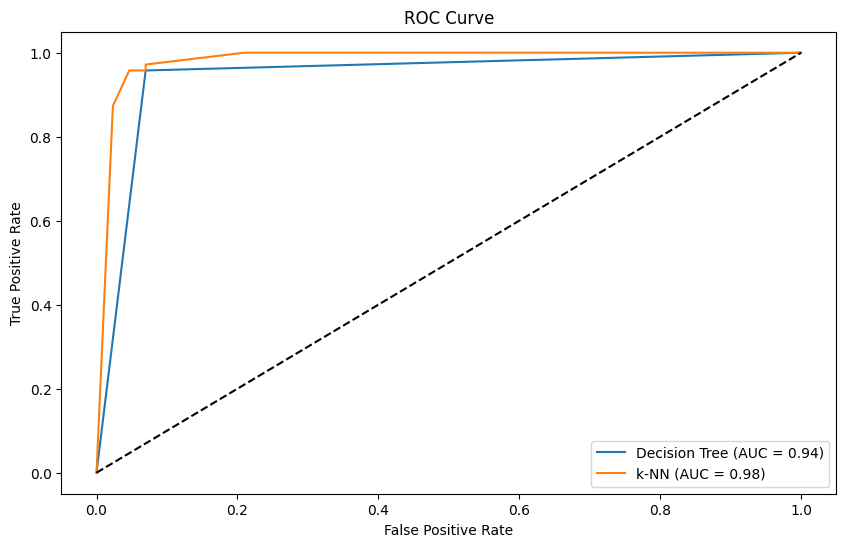

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

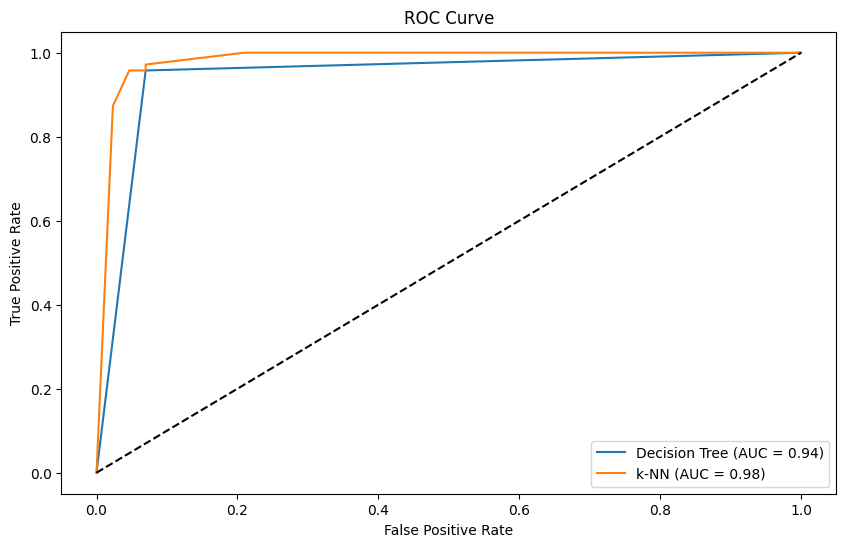

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Displaying the results in a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df
